In [0]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score
warnings.filterwarnings('ignore')

In [84]:
url = 'https://raw.githubusercontent.com/NastjaK666/uni/master/Hostel.csv'
data = pd.read_csv(url)
data.head()

,Unnamed: 0,hostel.name,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,"""Bike & Bed"" CharinCo Hostel",Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,2,& And Hostel,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,3,&And Hostel Akihabara,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,&And Hostel Ueno,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,5,&And Hostel-Asakusa North-,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


In [0]:
def EmptyReport(ScanData):
    ScanData.isnull().sum()
    DataSize = ScanData.shape
    AttributesNames = []
    EmptyData = []
    EmptyDataPercent = []
    for  i in ScanData:
        AttributesNames.append(i)
        EmptyData.append(ScanData[i].isnull().sum())
        EmptyDataPercent.append(round(ScanData[i].isnull().sum()/DataSize[0]*100,4))
    EmptyData = pd.DataFrame({'Attributes Names':AttributesNames, 
                             'Empty Data':EmptyData, 
                             'Empty Data (%)':EmptyDataPercent})
    return EmptyData

In [86]:
EmptyReport(data)

,Attributes Names,Empty Data,Empty Data (%)
0,Unnamed: 0,0,0.0000
1,hostel.name,0,0.0000
2,City,0,0.0000
3,price.from,0,0.0000
4,Distance,0,0.0000
5,summary.score,15,4.3860
6,rating.band,15,4.3860
7,atmosphere,15,4.3860
8,cleanliness,15,4.3860
9,facilities,15,4.3860


In [87]:
data1 = data.drop(columns='hostel.name')
print('Число колонок до удаления:', data.shape[1])
print('Число колонок после удаления:', data1.shape[1])
print("Процент потерь данных: {0} %".format(round((data.shape[1]-data1.shape[1])/data.shape[1]*100, 4)))
data1.head()

Число колонок до удаления: 16
Число колонок после удаления: 15
Процент потерь данных: 6.25 %


,Unnamed: 0,City,price.from,Distance,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,Osaka,3300,2.9km from city centre,9.2,Superb,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,2,Fukuoka-City,2600,0.7km from city centre,9.5,Superb,9.4,9.7,9.5,9.7,9.2,9.7,9.5,NaN,NaN
2,3,Tokyo,3600,7.8km from city centre,8.7,Fabulous,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,Tokyo,2600,8.7km from city centre,7.4,Very Good,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,5,Tokyo,1500,10.5km from city centre,9.4,Superb,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898


In [88]:
EmptyReport(data1)

,Attributes Names,Empty Data,Empty Data (%)
0,Unnamed: 0,0,0.0000
1,City,0,0.0000
2,price.from,0,0.0000
3,Distance,0,0.0000
4,summary.score,15,4.3860
5,rating.band,15,4.3860
6,atmosphere,15,4.3860
7,cleanliness,15,4.3860
8,facilities,15,4.3860
9,location.y,15,4.3860


In [89]:
data2 = data1.dropna(subset=['staff'])
print('Число записей до удаления:', data.shape[0])
print('Число записей после удаления:', data2.shape[0])
print("Процент потерь данных: {0} %".format(round((data.shape[0]-data2.shape[0])/data.shape[0]*100, 4)))
EmptyReport(data2)

Число записей до удаления: 342
Число записей после удаления: 327
Процент потерь данных: 4.386 %


,Attributes Names,Empty Data,Empty Data (%)
0,Unnamed: 0,0,0.0000
1,City,0,0.0000
2,price.from,0,0.0000
3,Distance,0,0.0000
4,summary.score,0,0.0000
5,rating.band,0,0.0000
6,atmosphere,0,0.0000
7,cleanliness,0,0.0000
8,facilities,0,0.0000
9,location.y,0,0.0000


In [90]:
data3 = data2.dropna(subset=['lon'])
print('Число записей до удаления:', data.shape[0])
print('Число записей после удаления:', data3.shape[0])
print("Процент потерь данных: {0} %".format(round((data.shape[0]-data3.shape[0])/data.shape[0]*100, 4)))
EmptyReport(data3)

Число записей до удаления: 342
Число записей после удаления: 298
Процент потерь данных: 12.8655 %


,Attributes Names,Empty Data,Empty Data (%)
0,Unnamed: 0,0,0.0
1,City,0,0.0
2,price.from,0,0.0
3,Distance,0,0.0
4,summary.score,0,0.0
5,rating.band,0,0.0
6,atmosphere,0,0.0
7,cleanliness,0,0.0
8,facilities,0,0.0
9,location.y,0,0.0


In [91]:
data3.dtypes

Unnamed: 0         int64
City              object
price.from         int64
Distance          object
summary.score    float64
rating.band       object
atmosphere       float64
cleanliness      float64
facilities       float64
location.y       float64
security         float64
staff            float64
valueformoney    float64
lon              float64
lat              float64
dtype: object

In [0]:
ClassCoded = data3[['City']]
le = LabelEncoder()
data3[['City']] = pd.DataFrame(le.fit_transform(ClassCoded),columns = [['City']])

In [0]:
ClassCoded = data3[['rating.band']]
le = LabelEncoder()
data3[['rating.band']] = pd.DataFrame(le.fit_transform(ClassCoded),columns = [['rating.band']])

In [94]:
Distance = []
for distance in data3['Distance']:
    Distance.append(float(distance[0:1]))
data3.update(pd.DataFrame({'Distance':Distance}))
data3 = data3.drop(columns='Distance')
data3.insert(1,'Distance',Distance, allow_duplicates=False)
data3.head()

,Unnamed: 0,Distance,City,price.from,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,2.0,3.0,3300,9.2,3.0,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
2,3,7.0,4.0,3600,8.7,4.0,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,8.0,4.0,2600,7.4,3.0,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,5,1.0,4.0,1500,9.4,4.0,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898
5,6,9.0,4.0,2100,7.0,3.0,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384


In [95]:
data3.dtypes

Unnamed: 0         int64
Distance         float64
City             float64
price.from         int64
summary.score    float64
rating.band      float64
atmosphere       float64
cleanliness      float64
facilities       float64
location.y       float64
security         float64
staff            float64
valueformoney    float64
lon              float64
lat              float64
dtype: object

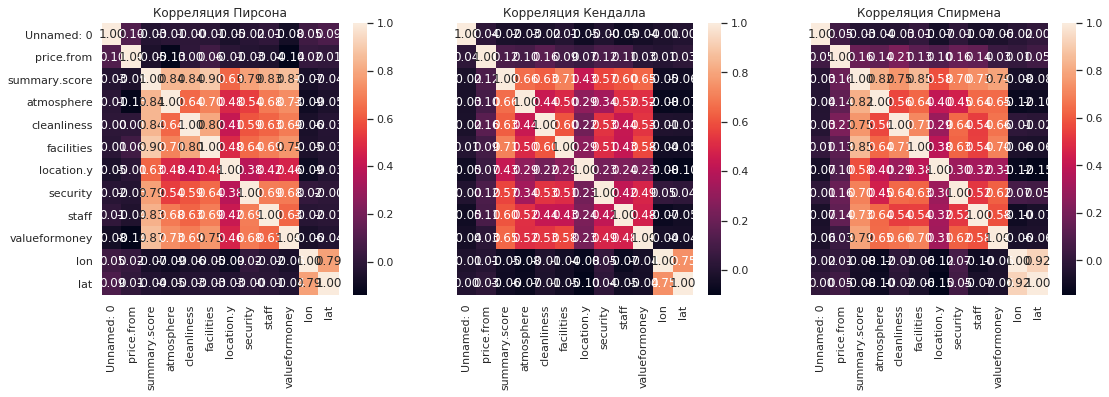

In [96]:
#Кореляционный анализ

fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(18,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
ax[0].title.set_text('Корреляция Пирсона')
ax[1].title.set_text('Корреляция Кендалла')
ax[2].title.set_text('Корреляция Спирмена')

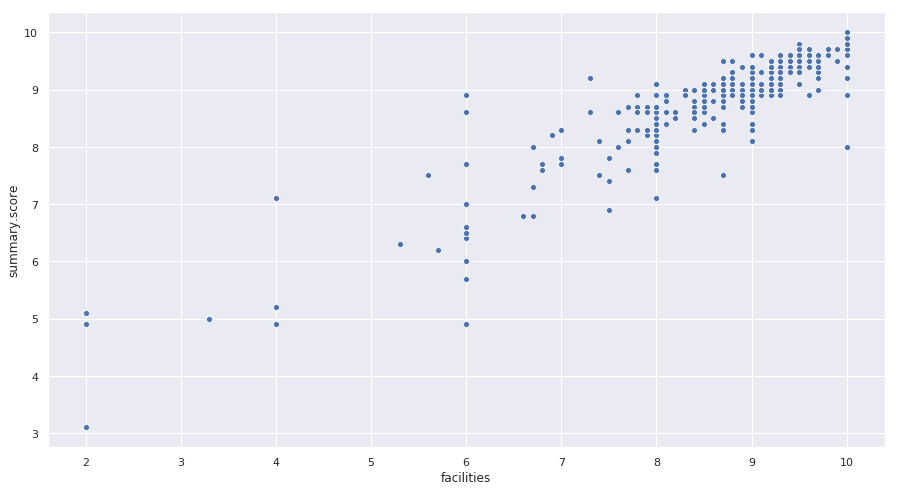

In [97]:
# Зависимость общей оценки от разных факторов
sns.scatterplot(y ='summary.score', x='facilities', data=data)

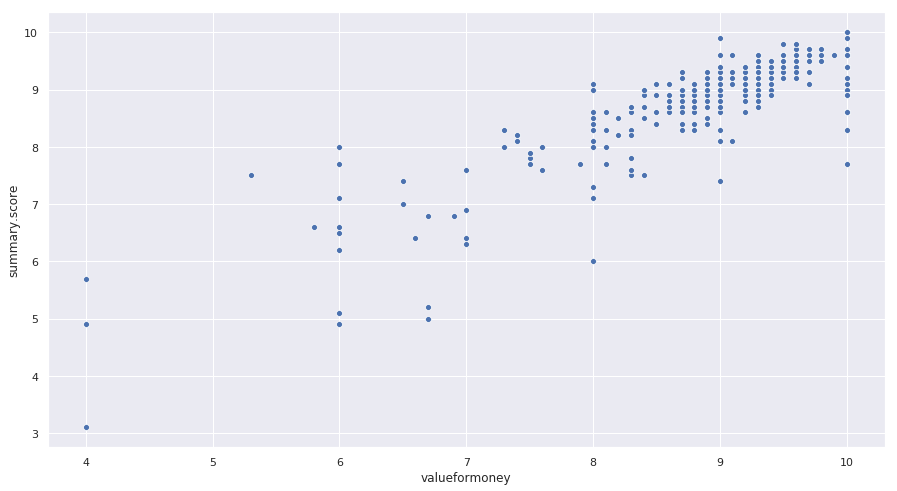

In [98]:
sns.scatterplot(y ='summary.score', x='valueformoney', data=data)

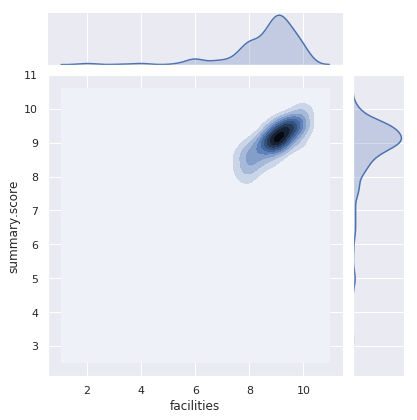

In [99]:
sns.jointplot(x='facilities', y='summary.score', data=data, kind = "kde")

    В качестве моделей машинного обучения будем тиспользовать следующий набор:
        1. Метод К соседей (Библиотека SkikitLearn)
        2. Линейная регессия (Библиотека SkikitLearn)
        3. Метод опорных векторов SVR (Библиотека SkikitLearn)
        4. Бустинг AdaBoostRegressor (Библиотека SkikitLearn)
        5. Случайный лес (Библиотека SkikitLearn)

In [100]:
pd.DataFrame(data3).reset_index(drop=True)

,Unnamed: 0,Distance,City,price.from,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,2.0,3.0,3300,9.2,3.0,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
1,3,7.0,4.0,3600,8.7,4.0,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
2,4,8.0,4.0,2600,7.4,3.0,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
3,5,1.0,4.0,1500,9.4,4.0,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898
4,6,9.0,4.0,2100,7.0,3.0,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384
5,7,1.0,4.0,3300,9.3,4.0,8.7,9.7,9.3,9.1,9.3,9.7,8.9,139.745467,35.548044
6,10,3.0,4.0,2200,7.7,3.0,6.7,7.2,6.8,8.5,7.8,8.5,8.1,139.724304,35.692512
7,11,9.0,4.0,1600,9.2,3.0,9.5,9.1,8.7,8.8,8.9,9.8,9.5,135.476956,34.622260
8,12,1.0,4.0,2000,8.5,3.0,8.1,8.3,8.4,7.8,8.9,9.1,8.9,139.800993,35.727547
9,13,8.0,4.0,2200,10.0,3.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,139.779382,35.697490


In [101]:
#pd.DataFrame(data3).fillna(0)
#pd.DataFrame(data3).dropna()
data4 = data3.dropna(axis = 0, how ='any')  
data4

,Unnamed: 0,Distance,City,price.from,summary.score,rating.band,atmosphere,cleanliness,facilities,location.y,security,staff,valueformoney,lon,lat
0,1,2.0,3.0,3300,9.2,3.0,8.9,9.4,9.3,8.9,9.0,9.4,9.4,135.513767,34.682678
2,3,7.0,4.0,3600,8.7,4.0,8.0,7.0,9.0,8.0,10.0,10.0,9.0,139.777472,35.697447
3,4,8.0,4.0,2600,7.4,3.0,8.0,7.5,7.5,7.5,7.0,8.0,6.5,139.783667,35.712716
4,5,1.0,4.0,1500,9.4,4.0,9.5,9.5,9.0,9.0,9.5,10.0,9.5,139.798371,35.727898
5,6,9.0,4.0,2100,7.0,3.0,5.5,8.0,6.0,6.0,8.5,8.5,6.5,139.786950,35.724384
6,7,1.0,4.0,3300,9.3,4.0,8.7,9.7,9.3,9.1,9.3,9.7,8.9,139.745467,35.548044
9,10,3.0,4.0,2200,7.7,3.0,6.7,7.2,6.8,8.5,7.8,8.5,8.1,139.724304,35.692512
10,11,9.0,4.0,1600,9.2,3.0,9.5,9.1,8.7,8.8,8.9,9.8,9.5,135.476956,34.622260
11,12,1.0,4.0,2000,8.5,3.0,8.1,8.3,8.4,7.8,8.9,9.1,8.9,139.800993,35.727547
12,13,8.0,4.0,2200,10.0,3.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,139.779382,35.697490


In [102]:
np.all(np.isfinite(data4))

True

In [0]:
data4[np.isneginf(data4)] = 0

In [0]:
DataInst = data4[['Unnamed: 0','City','price.from', 'Distance','summary.score', 'rating.band', 'atmosphere','cleanliness', 
                  'facilities', 'location.y','security','staff','valueformoney','lon','lat' ]]
DataTarget = data4[['summary.score']]
TrainX, TestX, TrainY, TestY = train_test_split(DataInst,DataTarget, test_size=0.3, random_state = 1)
GlReport = []

In [0]:
def ModelLearnReport(Model,trainX,trainY,testX,testY,ModelName):
    Model.fit(trainX,trainY)
    ModelPredict = Model.predict(testX)
    Report = [ModelName]
    Report.append(round(mean_absolute_error(testY, ModelPredict),6))
    Report.append(round(mean_squared_error(testY, ModelPredict),6))
    Report.append(round(r2_score(testY, ModelPredict),6))
    Report.append(round(explained_variance_score(testY, ModelPredict),6))
    print("Средняя абсолютная ошибка:\t",Report[1])
    print("Средняя квадратичная ошибка:\t",Report[2])
    print("Коэффициент детерминации:\t",Report[3])
    print("Explained variance score:\t",Report[4])
    return Report

In [106]:
# Метод К соседей
from sklearn.neighbors import KNeighborsRegressor
KNeighborsRegressor()

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [107]:
KNNRSP = KNeighborsRegressor(n_neighbors=5) # KNNRSP - K Nearest Neighbors Regressor Standart Parameters
GlReport.append(ModelLearnReport(KNNRSP,TrainX,TrainY,TestX,TestY,'KNN5'))

Средняя абсолютная ошибка:	 0.685897
Средняя квадратичная ошибка:	 0.857338
Коэффициент детерминации:	 -0.181703
Explained variance score:	 -0.181467


In [108]:
TuningParameters = [{'n_neighbors':np.array(range(1,16))}]
GS = GridSearchCV(KNeighborsRegressor(), TuningParameters, cv=20, scoring='explained_variance')
GS.fit(DataInst,DataTarget)
print('Подобранный оптимальный гиперпараметр: ', GS.best_params_.get('n_neighbors'))
KNNRGS = KNeighborsRegressor(n_neighbors=GS.best_params_.get('n_neighbors')) 
GlReport.append(ModelLearnReport(KNNRGS,TrainX,TrainY,TestX,TestY,'KNN' + str(GS.best_params_.get('n_neighbors'))))

Подобранный оптимальный гиперпараметр:  11
Средняя абсолютная ошибка:	 0.595571
Средняя квадратичная ошибка:	 0.722058
Коэффициент детерминации:	 0.00476
Explained variance score:	 0.008094


In [109]:
# Линейная регрессия
from sklearn.linear_model import Lasso
Lasso()

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [110]:
LRSP = Lasso() # LRSP - Linear Regression Standart Parameters
GlReport.append(ModelLearnReport(LRSP,TrainX,TrainY,TestX,TestY,'Lasso alpha 1.0'))

Средняя абсолютная ошибка:	 2.912521
Средняя квадратичная ошибка:	 433.109586
Коэффициент детерминации:	 -595.971625
Explained variance score:	 -588.122924


In [111]:
TuningParameters = [{'alpha':[0.001,0.01,0.1,1,10,100,1000]}]
GS = GridSearchCV(Lasso(), TuningParameters, cv=20, scoring='explained_variance')
GS.fit(DataInst,DataTarget)
print('Подобранный оптимальный гиперпараметр: ', GS.best_params_.get('alpha'))
LRGS = Lasso(alpha=GS.best_params_.get('alpha')) 
GlReport.append(ModelLearnReport(LRGS,TrainX,TrainY,TestX,TestY,'Lasso alpha '+str(GS.best_params_.get('alpha'))))

Подобранный оптимальный гиперпараметр:  0.001
Средняя абсолютная ошибка:	 0.004576
Средняя квадратичная ошибка:	 0.001093
Коэффициент детерминации:	 0.998494
Explained variance score:	 0.998514


In [112]:
# Метод опорных векторов
from sklearn.svm import LinearSVR
LinearSVR()

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [113]:
LSVRSP = LinearSVR() # LSVRSP - Linear Support Vector Regressor Standart Parameters
GlReport.append(ModelLearnReport(LSVRSP,TrainX,TrainY,TestX,TestY,'SVR C 1.0'))

Средняя абсолютная ошибка:	 2.048292
Средняя квадратичная ошибка:	 190.609153
Коэффициент детерминации:	 -261.723937
Explained variance score:	 -258.809477


In [114]:
TuningParameters = [{'C':[0.001,0.01,0.1,1]}]
GS = GridSearchCV(LinearSVR(), TuningParameters, cv=20, scoring='explained_variance')
GS.fit(DataInst,DataTarget)
print('Подобранный оптимальный гиперпараметр: ', GS.best_params_.get('C'))
LSVRGS = LinearSVR(C=GS.best_params_.get('C')) 
GlReport.append(ModelLearnReport(LSVRGS,TrainX,TrainY,TestX,TestY,'SVR C '+str(GS.best_params_.get('C'))))

Подобранный оптимальный гиперпараметр:  1
Средняя абсолютная ошибка:	 2.835227
Средняя квадратичная ошибка:	 280.60045
Коэффициент детерминации:	 -385.762409
Explained variance score:	 -375.80762


In [115]:
# Случайный лес
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [116]:
RFRSP = RandomForestRegressor(n_estimators=5) # RFRSP - Random Forest Regressor Standart Parameters
GlReport.append(ModelLearnReport(RFRSP,TrainX,TrainY,TestX,TestY,'Random Forest 5'))

Средняя абсолютная ошибка:	 0.038974
Средняя квадратичная ошибка:	 0.026031
Коэффициент детерминации:	 0.964121
Explained variance score:	 0.964173


In [117]:
TuningParameters = [{'n_estimators':np.array(range(1,50))}]
GS = GridSearchCV(RandomForestRegressor(), TuningParameters, cv=20, scoring='explained_variance')
GS.fit(DataInst,DataTarget)
print('Подобранный оптимальный гиперпараметр: ', GS.best_params_.get('n_estimators'))
RFRGS = RandomForestRegressor(n_estimators=GS.best_params_.get('n_estimators')) 
GlReport.append(ModelLearnReport(RFRGS,TrainX,TrainY,TestX,TestY,'Random Forest '+str(GS.best_params_.get('n_estimators'))))

Подобранный оптимальный гиперпараметр:  46
Средняя абсолютная ошибка:	 0.017614
Средняя квадратичная ошибка:	 0.002998
Коэффициент детерминации:	 0.995868
Explained variance score:	 0.995891


In [118]:
# Бустинг

from sklearn.ensemble import AdaBoostRegressor
AdaBoostRegressor()

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [119]:
ABRSP = AdaBoostRegressor(n_estimators=10) # RFRSP - Random Forest Regressor Standart Parameters
GlReport.append(ModelLearnReport(ABRSP,TrainX,TrainY,TestX,TestY,'Ada Boost 10'))

Средняя абсолютная ошибка:	 0.107485
Средняя квадратичная ошибка:	 0.022506
Коэффициент детерминации:	 0.968979
Explained variance score:	 0.972611


In [120]:
TuningParameters = [{'n_estimators':np.array(range(1,50))}]
GS = GridSearchCV(AdaBoostRegressor(), TuningParameters, cv=20, scoring='explained_variance')
GS.fit(DataInst,DataTarget)
print('Подобранный оптимальный гиперпараметр: ', GS.best_params_.get('n_estimators'))
ABRGS = AdaBoostRegressor(n_estimators=GS.best_params_.get('n_estimators')) 
GlReport.append(ModelLearnReport(ABRGS,TrainX,TrainY,TestX,TestY,'Ada Boost '+str(GS.best_params_.get('n_estimators'))))

Подобранный оптимальный гиперпараметр:  46
Средняя абсолютная ошибка:	 0.073929
Средняя квадратичная ошибка:	 0.012635
Коэффициент детерминации:	 0.982585
Explained variance score:	 0.98293


In [121]:
GlReport = pd.DataFrame(GlReport, columns=['Model','MAE','MSE','R^2','EVS'])
GlReport

,Model,MAE,MSE,R^2,EVS
0,KNN5,0.685897,0.857338,-0.181703,-0.181467
1,KNN11,0.595571,0.722058,0.004760,0.008094
2,Lasso alpha 1.0,2.912521,433.109586,-595.971625,-588.122924
3,Lasso alpha 0.001,0.004576,0.001093,0.998494,0.998514
4,SVR C 1.0,2.048292,190.609153,-261.723937,-258.809477
5,SVR C 1,2.835227,280.600450,-385.762409,-375.807620
6,Random Forest 5,0.038974,0.026031,0.964121,0.964173
7,Random Forest 46,0.017614,0.002998,0.995868,0.995891
8,Ada Boost 10,0.107485,0.022506,0.968979,0.972611
9,Ada Boost 46,0.073929,0.012635,0.982585,0.982930


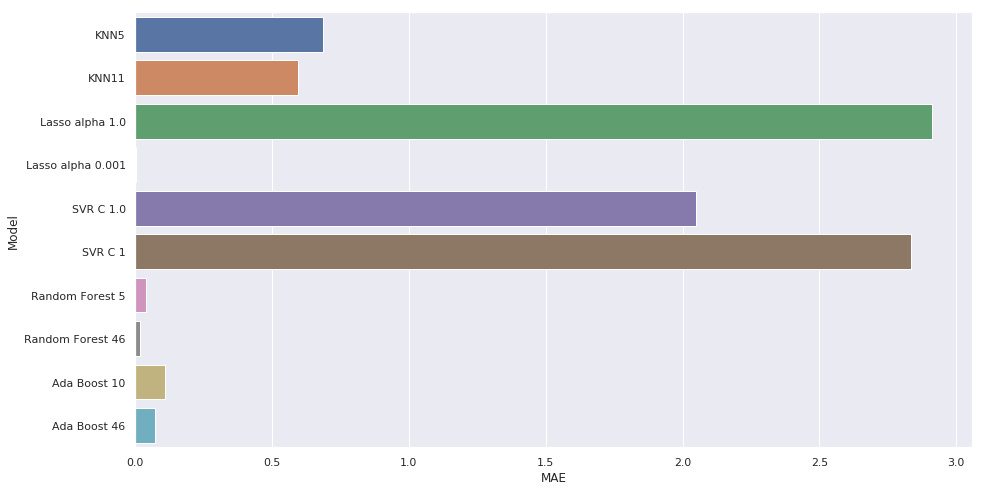

In [122]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x="MAE", y="Model", data=GlReport)
# Mean Squared Error (MSE)
# Mean Absolute Error (MAE)
# Explained variance score (EVS)
# coefficient of determination (R²) 


In [0]:
# как видно из диаграммы выше, линейная регрессия и метод опорных векторов не эффективны для данного датасета
# последующие диаграммы строим без них
GlR1=GlReport.drop([2,4,5],axis=0)

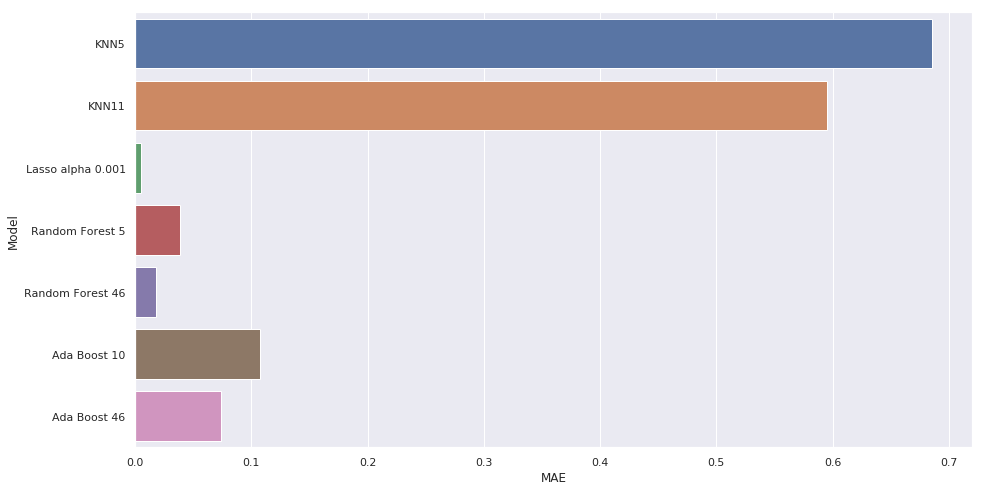

In [124]:
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(x="MAE", y="Model", data=GlR1)
# чем меньше тем лучше

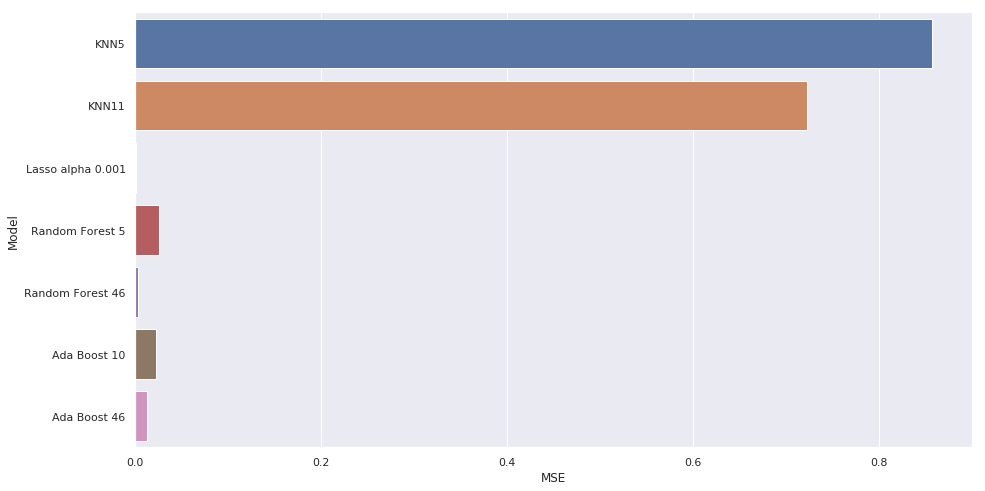

In [125]:
sns.barplot(x="MSE", y="Model", data=GlR1)
# чем больше тем хуже

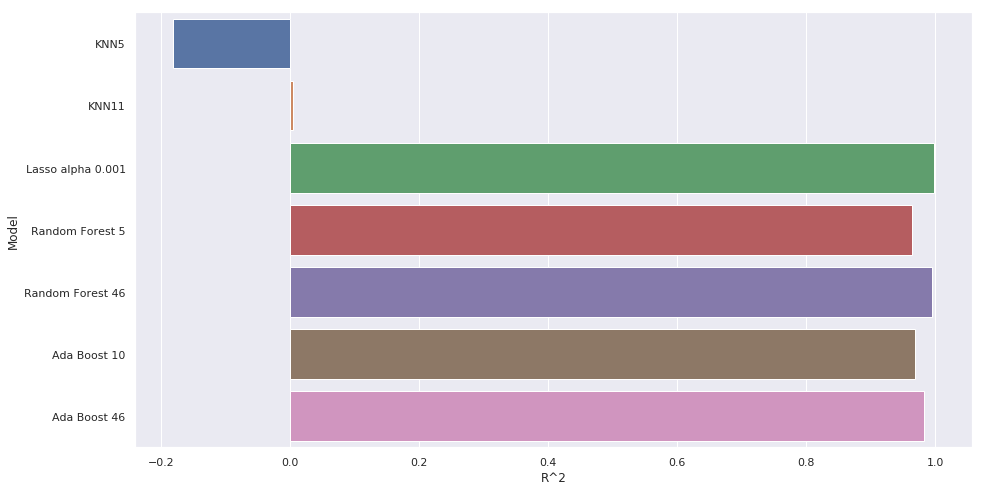

In [126]:
sns.barplot(x="R^2", y="Model", data=GlR1)
# When R² is negative it means that the model is worse than predicting the mean

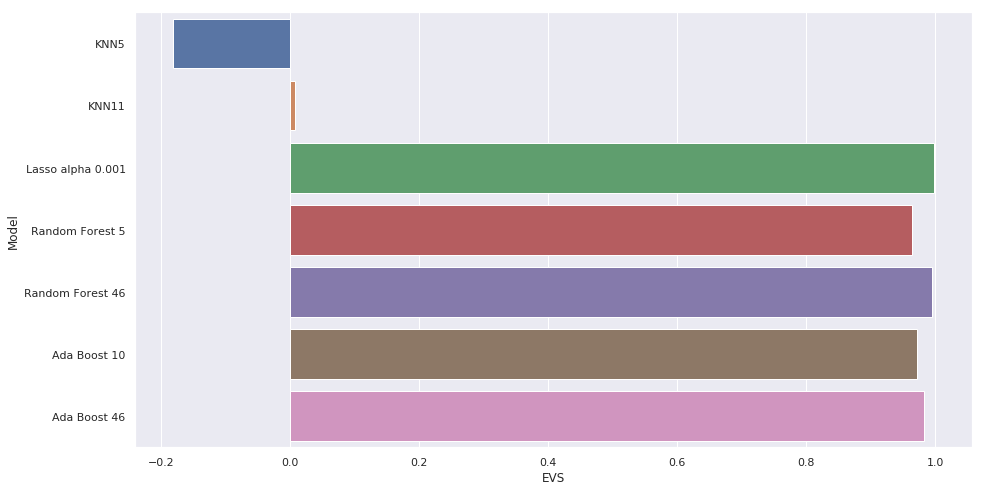

In [127]:
sns.barplot(x="EVS", y="Model", data=GlR1)